# Predicting Walmart Store Sales

In [136]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [137]:
data_raw = pd.read_csv(r'C:\Users\felix\OneDrive\Dokumente\Python Projects\Walmart Sales Forecast\walmart_cleaned.csv')
data_raw = data_raw.drop('Unnamed: 0', axis=1)
data_raw.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [138]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   IsHoliday     421570 non-null  int64  
 3   Dept          421570 non-null  float64
 4   Weekly_Sales  421570 non-null  float64
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  int64  
 15  Size          421570 non-null  int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 51.5+ MB


# Data Exploration

In [139]:
data_raw.groupby('Store')['Store'].count()

Store
1     10244
2     10238
3      9036
4     10272
5      8999
6     10211
7      9762
8      9895
9      8867
10    10315
11    10062
12     9705
13    10474
14    10040
15     9901
16     9443
17     9864
18     9859
19    10148
20    10214
21     9582
22     9688
23    10050
24    10228
25     9804
26     9854
27    10225
28    10113
29     9455
30     7156
31    10142
32    10202
33     6487
34    10224
35     9528
36     6222
37     7206
38     7362
39     9878
40    10017
41    10088
42     6953
43     6751
44     7169
45     9637
Name: Store, dtype: int64

This shows that not every store has equal amount of observations. The number of observations is relatively balanced for each store and therefore does not present an issue for future model training and subsequent model performance.

In [140]:
data_raw.describe()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


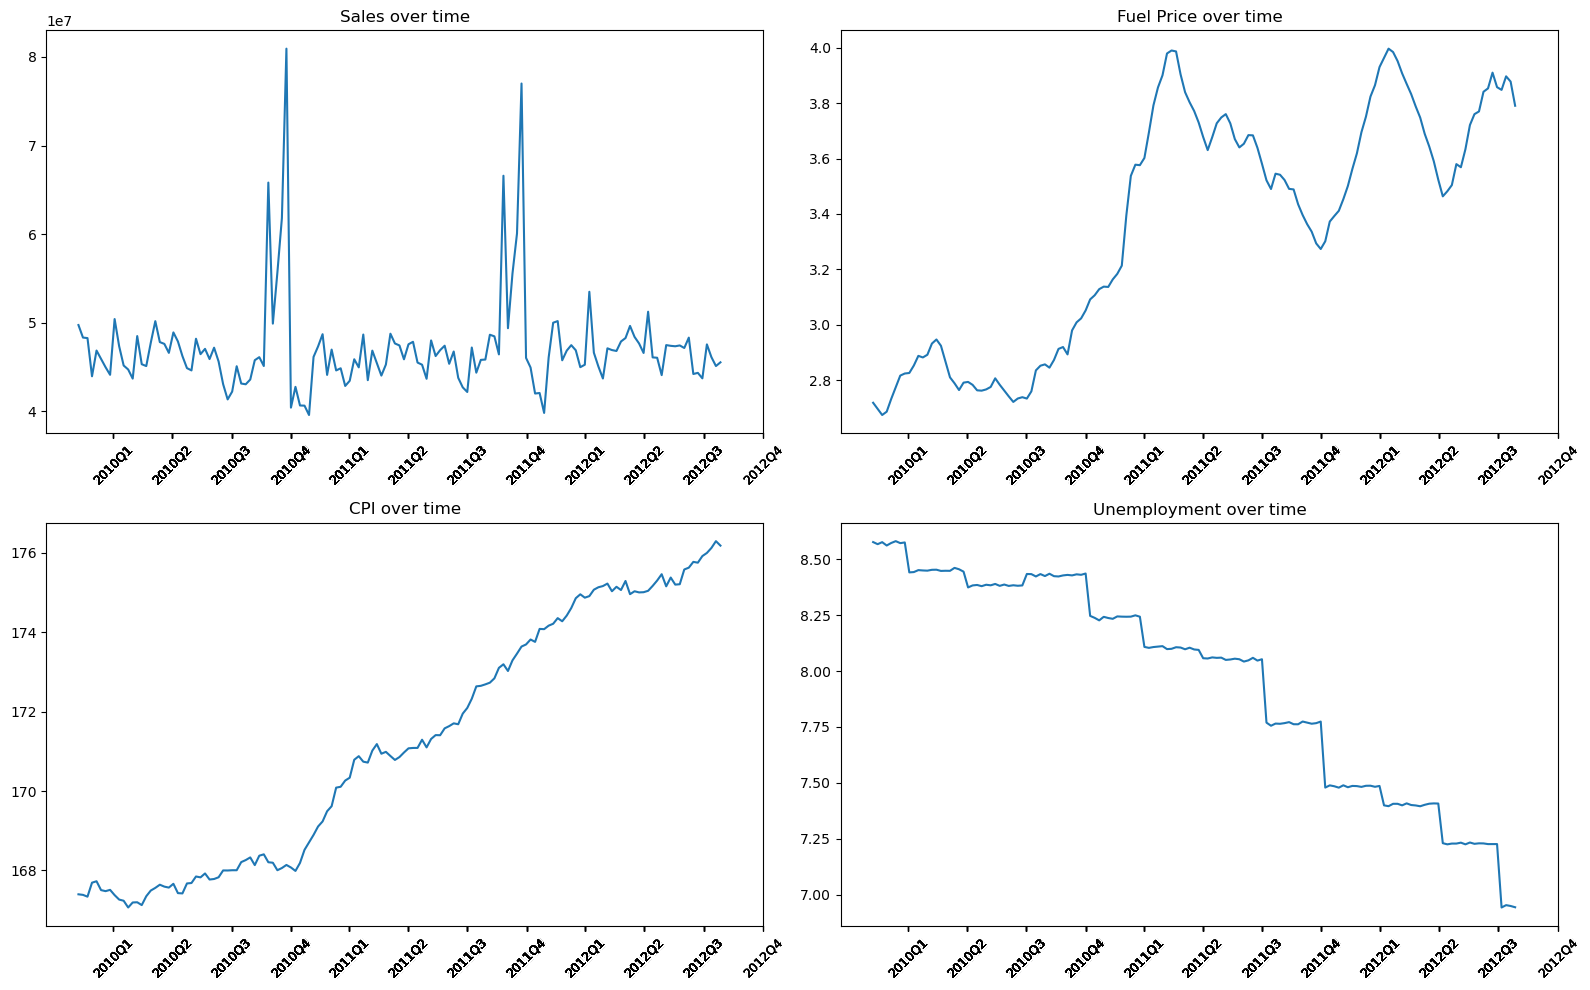

In [141]:
data_raw['Date'] = pd.to_datetime(data_raw['Date']) 

figure, axis = plt.subplots(2, 2, figsize=(16, 10)) 
sales = data_raw.groupby('Date')['Weekly_Sales'].sum()
fuel_price = data_raw.groupby('Date')['Fuel_Price'].mean()
cpi = data_raw.groupby('Date')['CPI'].mean()
unemployment = data_raw.groupby('Date')['Unemployment'].mean()
time = data_raw['Date'].unique()

quarters = pd.PeriodIndex(time, freq='Q')

axis[0, 0].plot(time, sales)
axis[0, 0].set_title("Sales over time")
axis[0, 0].set_xticks(quarters)
axis[0, 0].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[0, 1].plot(time, fuel_price)
axis[0, 1].set_title("Fuel Price over time")
axis[0, 1].set_xticks(quarters)
axis[0, 1].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[1, 0].plot(time, cpi)
axis[1, 0].set_title("CPI over time")
axis[1, 0].set_xticks(quarters)
axis[1, 0].set_xticklabels(quarters, rotation=45, fontsize = 9)

axis[1, 1].plot(time, unemployment)
axis[1, 1].set_title("Unemployment over time")
axis[1, 1].set_xticks(quarters)
axis[1, 1].set_xticklabels(quarters, rotation=45, fontsize = 9)

plt.tight_layout()
plt.show()


https://www.geeksforgeeks.org/how-to-prepare-data-before-deploying-a-machine-learning-model/?ref=ml_lbp

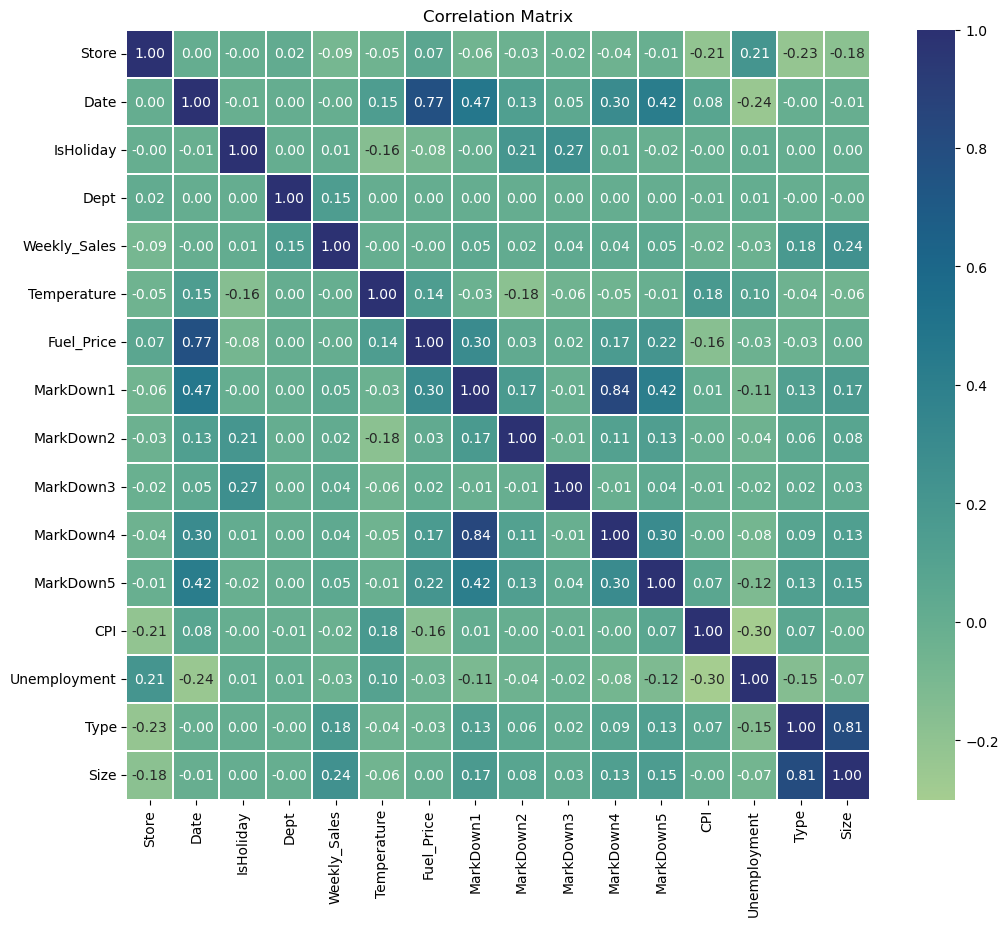

In [142]:
# Correlation plot 

corr_matrix = data_raw.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="crest",  fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

### For simplicity reasons, the target variable (weekly sales) will be predicted aggregated over the different stores.

### Split the data

In [143]:
sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [144]:
fuel_price

Date
2010-02-05    2.717869
2010-02-12    2.696102
2010-02-19    2.673666
2010-02-26    2.685642
2010-03-05    2.731816
                ...   
2012-09-28    3.858245
2012-10-05    3.848435
2012-10-12    3.897425
2012-10-19    3.878413
2012-10-26    3.791086
Name: Fuel_Price, Length: 143, dtype: float64

In [145]:
cpi

Date
2010-02-05    167.398405
2010-02-12    167.384138
2010-02-19    167.338966
2010-02-26    167.691019
2010-03-05    167.727351
                 ...    
2012-09-28    175.919639
2012-10-05    175.998254
2012-10-12    176.123786
2012-10-19    176.295499
2012-10-26    176.182886
Name: CPI, Length: 143, dtype: float64

In [146]:
unemployment

Date
2010-02-05    8.576731
2010-02-12    8.567309
2010-02-19    8.576351
2010-02-26    8.561375
2010-03-05    8.572689
                ...   
2012-09-28    7.225855
2012-10-05    6.942141
2012-10-12    6.952682
2012-10-19    6.948928
2012-10-26    6.943212
Name: Unemployment, Length: 143, dtype: float64

In [147]:
# choose 80% of the data for training and 20% for testing

train_dates = sales.index[:int(0.8*(len(sales)))]
test_dates = sales.index[int(0.8*(len(sales))):]
                        

train_sales = sales[:int(0.8*(len(sales)))]
test_sales = sales[int(0.8*(len(sales))):]

train_fuel_price = fuel_price[:int(0.8*(len(fuel_price)))]
test_fuel_price = fuel_price[int(0.8*(len(fuel_price))):]

train_cpi = cpi[:int(0.8*(len(cpi)))]
test_cpi = cpi[int(0.8*(len(cpi))):]

train_unemployment = unemployment[:int(0.8*(len(unemployment)))]
test_unemployment = unemployment[int(0.8*(len(unemployment))):]
                                 

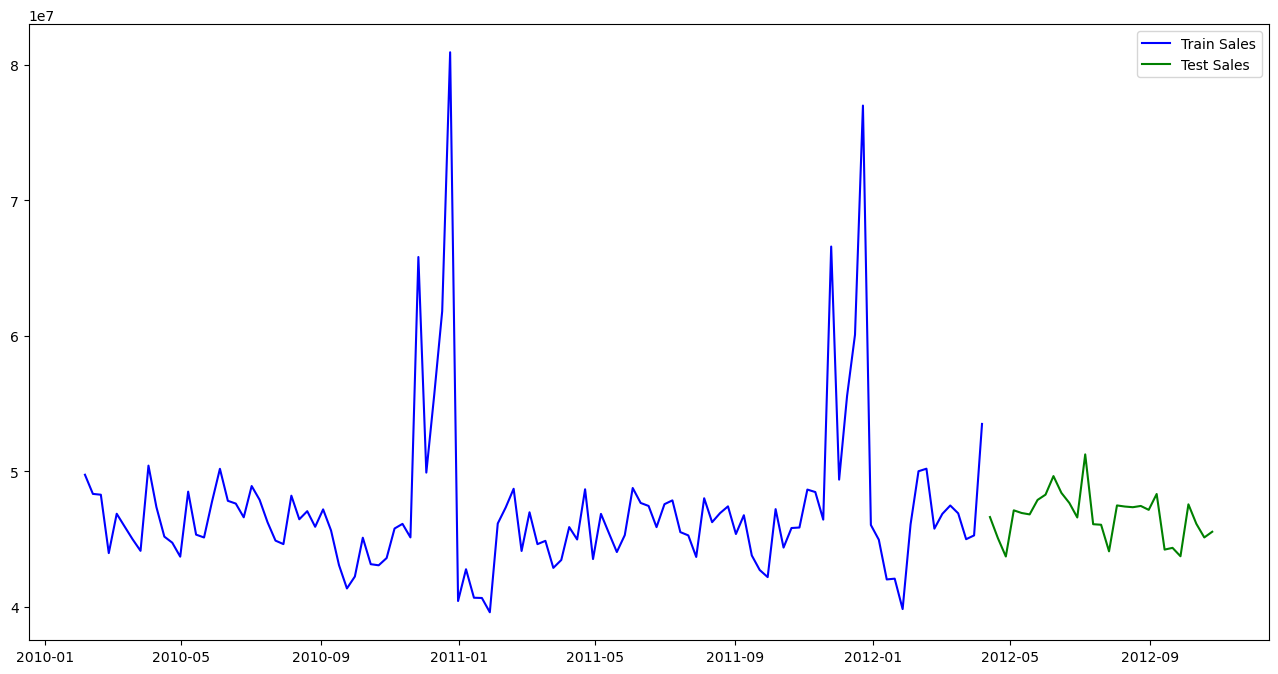

In [148]:
# visualize the sales data in different colors

plt.figure(figsize=(16, 8))
plt.plot(train_sales, label='Train Sales', color='blue')
plt.plot(test_sales, label='Test Sales', color='green')
plt.legend()
plt.show()


### Perform ``Linear Regression``, ``Holt Winter's Exponential Smoothing`` & ``(S)ARIMA(X)`` to Predict Sales


### 1. Linear Regression

In [149]:
train_dates

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09', '2012-03-16', '2012-03-23',
               '2012-03-30', '2012-04-06'],
              dtype='datetime64[ns]', name='Date', length=114, freq=None)

In [150]:
len(test_dates)

29

In [151]:
# make dates ordinal for the model

# train_dates = train_dates.map(dt.datetime.toordinal)
# test_dates = test_dates.map(dt.datetime.toordinal)

In [152]:
# import packages for linear regression with statsmodels

import statsmodels.api as sm

In [153]:
# define the independent variables

X = np.column_stack((train_cpi, train_fuel_price, train_unemployment))
X = sm.add_constant(X)

# define the dependent variable

y = train_sales

# fit the model

model = sm.OLS(y, X)
results = model.fit()

# print the summary of the model

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.229
Date:                Fri, 16 Aug 2024   Prob (F-statistic):             0.0253
Time:                        20:00:58   Log-Likelihood:                -1936.3
No. Observations:                 114   AIC:                             3881.
Df Residuals:                     110   BIC:                             3892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.66e+08   2.58e+08     -2.581      0.0

In [154]:
X_test

array([[  1.        , 175.07204708,   3.99743231,   7.39538831],
       [  1.        , 175.13381869,   3.98515227,   7.40594252],
       [  1.        , 175.16387309,   3.95267874,   7.40598883],
       [  1.        , 175.226424  ,   3.90825415,   7.39906734],
       [  1.        , 175.03319386,   3.87021191,   7.4079926 ],
       [  1.        , 175.14570858,   3.83338808,   7.40055943],
       [  1.        , 175.06437143,   3.78889323,   7.39866202],
       [  1.        , 175.29254108,   3.74826538,   7.39501223],
       [  1.        , 174.95964967,   3.6895098 ,   7.40151622],
       [  1.        , 175.03312939,   3.64394181,   7.40645399],
       [  1.        , 175.0041991 ,   3.59093516,   7.40775245],
       [  1.        , 175.00913158,   3.52383021,   7.40717559],
       [  1.        , 175.04460692,   3.46376562,   7.22984465],
       [  1.        , 175.16725769,   3.48213923,   7.22465075],
       [  1.        , 175.30337657,   3.50435027,   7.22809993],
       [  1.        , 175

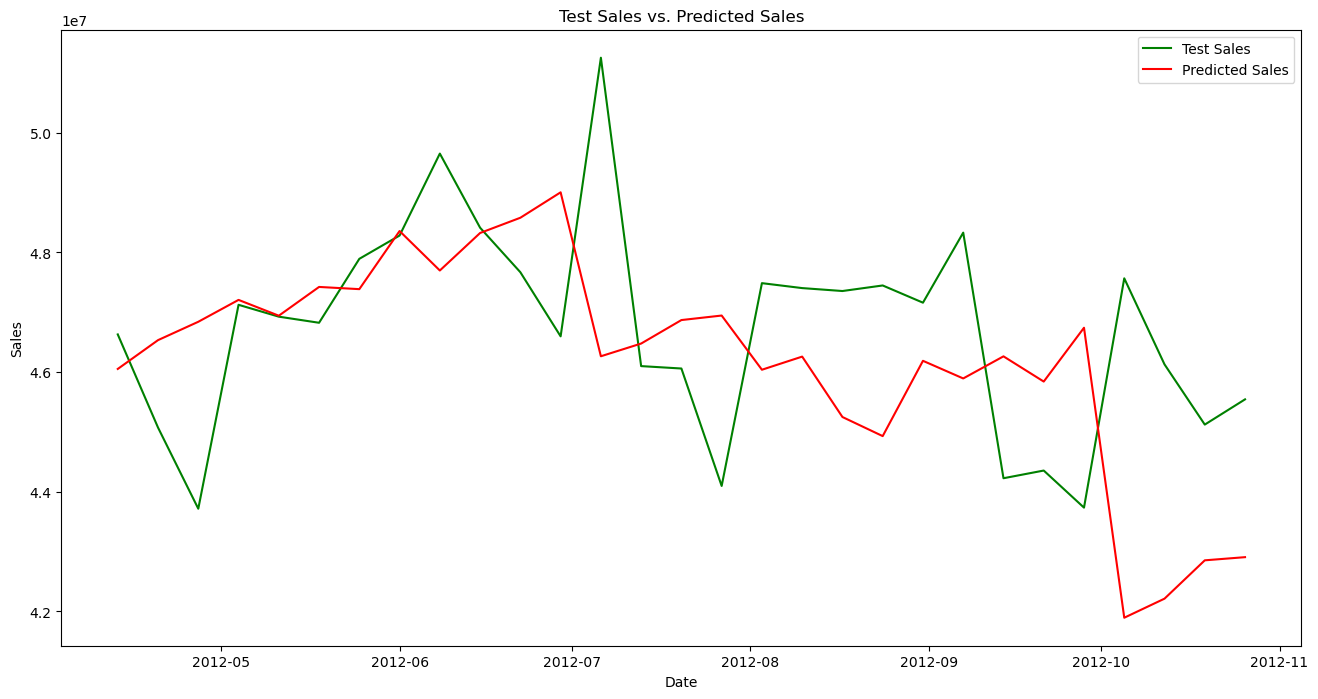

In [155]:
# predict 

X_test = np.column_stack((test_cpi, test_fuel_price, test_unemployment))
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)

# visualize the prediction
plt.figure(figsize=(16, 8))
plt.plot(test_dates, test_sales.values, label='Test Sales', color='green')
plt.plot(test_dates, y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Sales')  # Label for y-axis
plt.title('Test Sales vs. Predicted Sales')
plt.legend()
plt.show()

In [156]:
# calculate the mean squared error, rmse, mape

from sklearn.metrics import mean_squared_error
from math import sqrt


mse_lm = mean_squared_error(test_sales, y_pred)
rmse_lm = sqrt(mse_lm)
mape_lm = np.mean(np.abs((test_sales - y_pred) / test_sales)) * 100

In [157]:
mape_lm

3.8847086034875957

As can be seen from the comparison above, a simple linear regression to predict sales, using the independent variables CPI (mean), unemployement rate (mean) and fuel price (mean) yield rather poor prediction outcomes, with an R squared of 0.081 on the 80/20 train/test split. This further suggests that this model is unable to capture the complexity in the underlying time series data.

Therefore, it might be useful to explore other, more elaborate statistical models.

## Holt Winters Exponential Smoothing

In [158]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

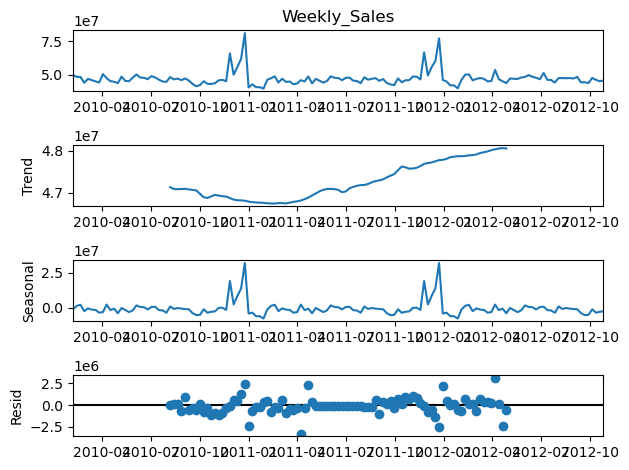

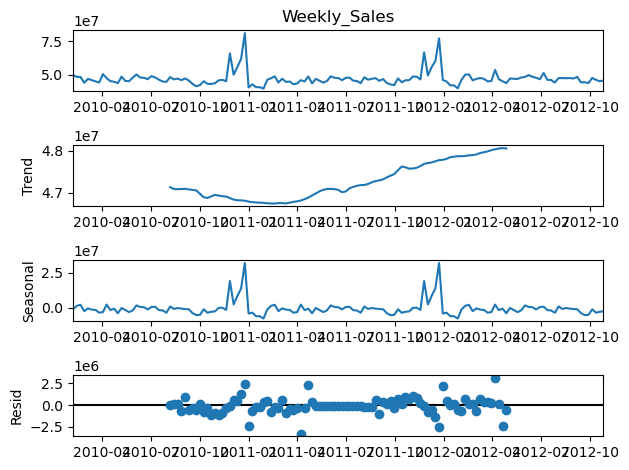

In [159]:
seasonal_decompose(sales, period=52).plot()

The decomposition above shows the different categories of decomposition on the underlying sales data. It shows a rather close and evenly distributed residuals around the mean. Moreover, it suggests seasonality and an upwards trend in sales over time.

a) Additive Model

In [160]:
# Holt-Winters Exponential Smoothing

HW_add = ExponentialSmoothing(train_sales, seasonal='add', seasonal_periods=52)
HW_add_model = HW_add.fit()
HW_add_pred = HW_add_model.forecast(len(test_sales))


c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\felix\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


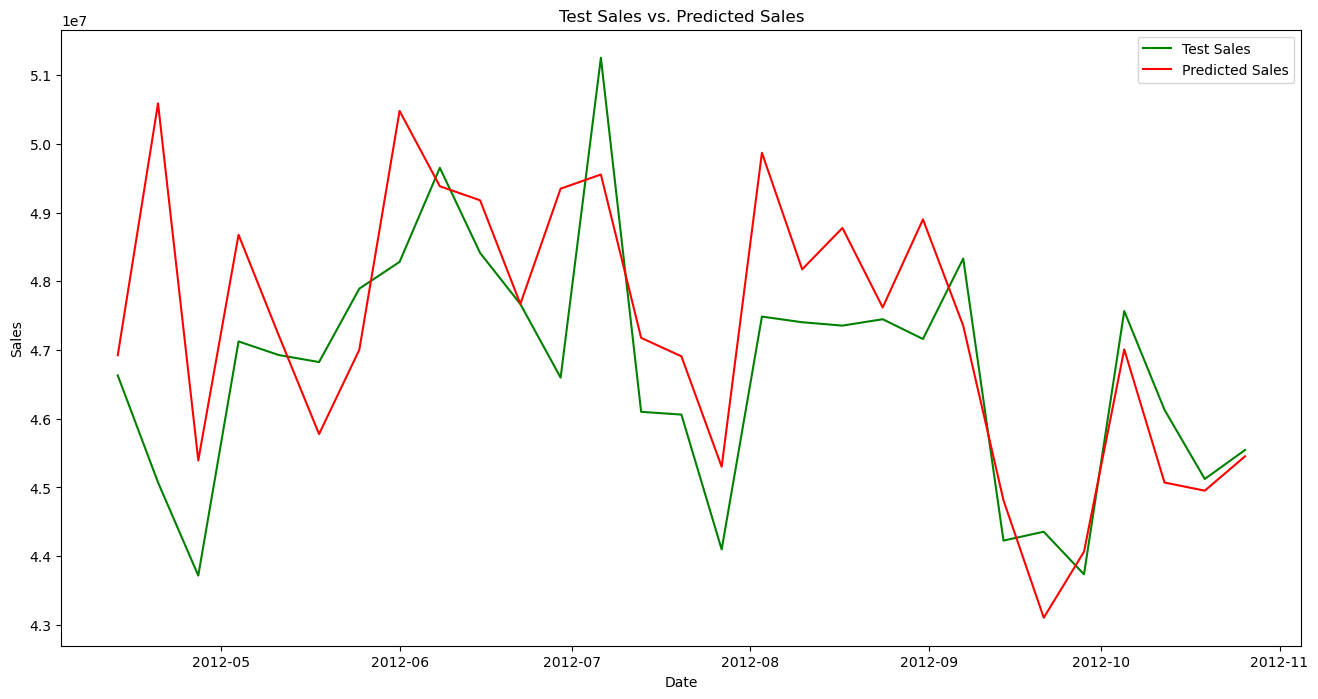

In [161]:
# visualize the prediction
plt.figure(figsize=(16, 8))
plt.plot(test_dates, test_sales.values, label='Test Sales', color='green')
plt.plot(test_dates, HW_add_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Sales')  # Label for y-axis
plt.title('Test Sales vs. Predicted Sales')
plt.legend()
plt.show()

In [162]:
# calculate the mean squared error, rmse, mean absolute percentage error

mse_hw = mean_squared_error(test_sales, HW_add_pred)
rmse_hw = sqrt(mse_hw)
mape_hw = mean_absolute_percentage_error(test_sales, HW_add_pred)*100

In [163]:
mape_hw

2.4886317003773626

## ARIMA model

In [ ]:
# Perform ARIMA model 

from statsmodels.tsa.arima.model import ARIMA
